In [61]:
using Random, Distributions, LinearAlgebra, Plots, LaTeXStrings
Random.seed!(123);

# Mean simulation

In [62]:
μ = 0;σ = 1;
Nₛ =  Normal(μ,σ);
μₜ = exp(Nₛ.μ+1/2*Nₛ.σ^2);
σₜ = exp(2*Nₛ.μ+Nₛ.σ^2)*(exp(Nₛ.σ^2)-1);

In [63]:
ns = 10:10:10000;
antithetic = zeros(length(ns));
accept_reject = zeros(length(ns));

In [64]:
for i in 1:length(ns)
    # Simulate E[X], where X~exp(N(0,1)) with normal simulation draw
    ar_sample = rand(Nₛ,ns[i]);
    accept_reject[i] = mean(exp.(ar_sample));

    # Simulate E[X], where X~exp(N(0,1)) with antithetic sample
    at_sample = rand(Nₛ,Int(ns[i]/2));
    at_sample = [at_sample;-at_sample];
    antithetic[i] = mean(exp.(at_sample));
end

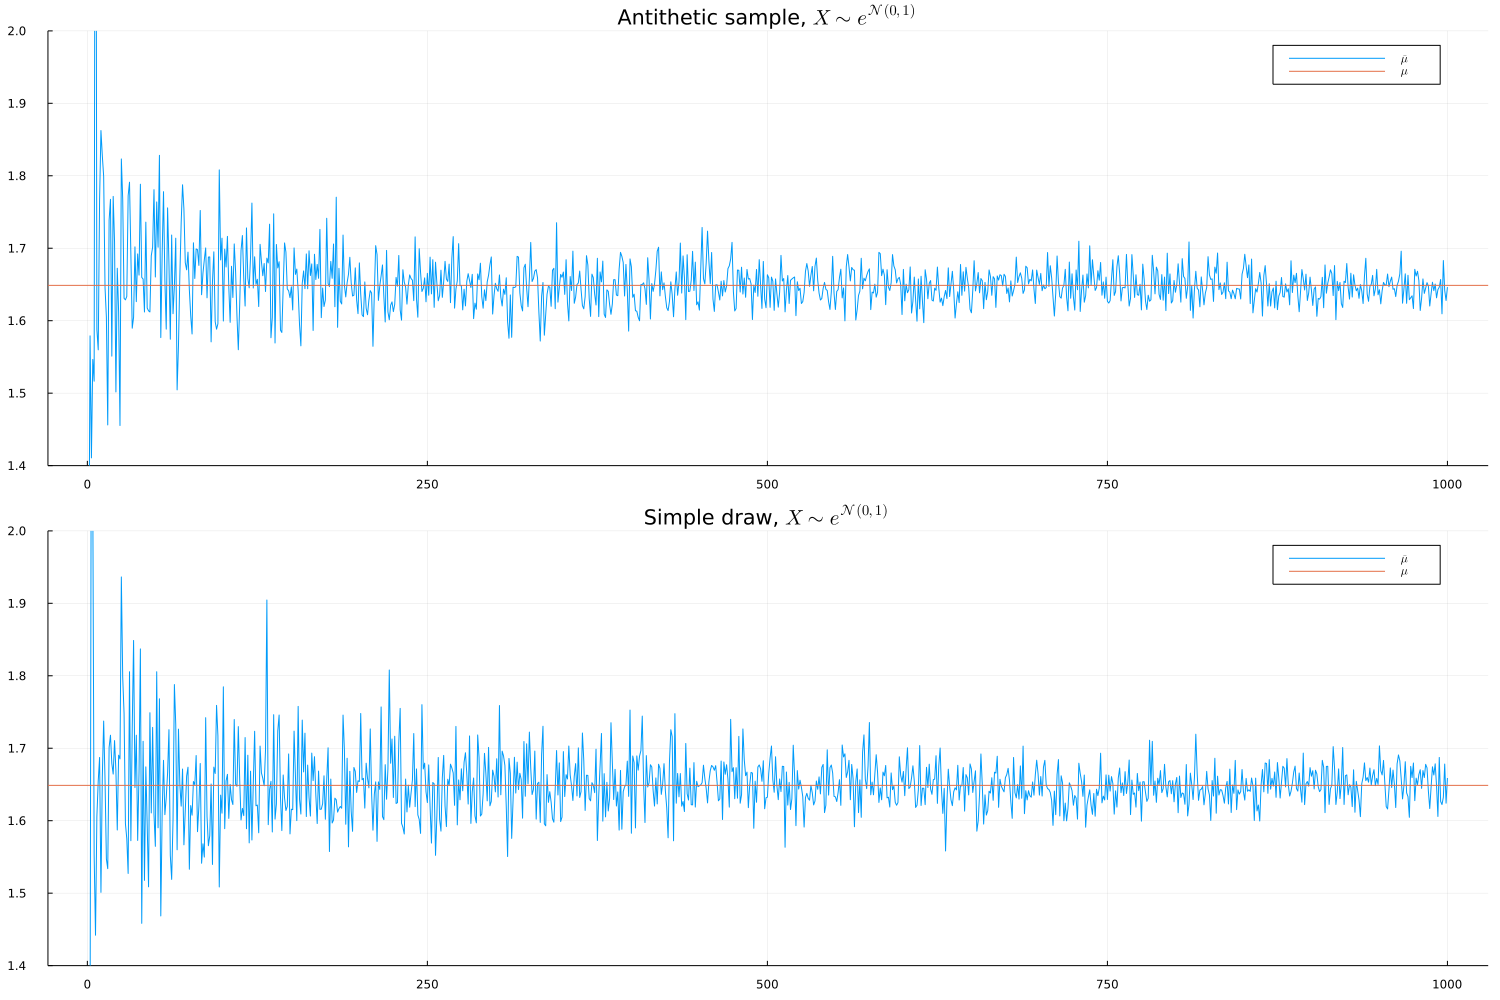

In [65]:
at_var = round(var(antithetic), digits=5);
p1 = plot(
    antithetic,
    label=L"\bar{\mu}",
    title=L"Antithetic sample, $X\sim e^{\mathcal{N(0,1)}}$"
)
hline!([μₜ], label=L"\mu")

ar_var =round(var(accept_reject), digits=5);
p2 = plot(
    accept_reject,
    labels=L"\bar{\mu}",
    title=L"Simple draw, $X\sim e^{\mathcal{N(0,1)}}$"
)
hline!([μₜ], label=L"\mu")

plot(p1,p2,layout=(2,1),size=(1500,1000),ylim=(1.4,2))

# Tests for correlation, covariance, etc.

In [6]:
at_sample = rand(Nₛ,1000);

In [73]:
println("Covariance between negative and positive standard normal: ", cov(at_sample,-at_sample))
println("Correlation between negative and positive standard normal: ", cor(at_sample,-at_sample))

Covariance between negative and positive standard normal: -1.014860367169096
Correlation between negative and positive standard normal: -1.0


In [74]:
println("Covariance between positive and negative exponential samples: ", cov(exp.(at_sample),exp.(-at_sample)))
println("Correlation between positive and negative exponential samples: ", cor(exp.(at_sample),exp.(-at_sample)))

Covariance between positive and negative exponential samples: -1.7241481366780556
Correlation between positive and negative exponential samples: -0.4115066637229836


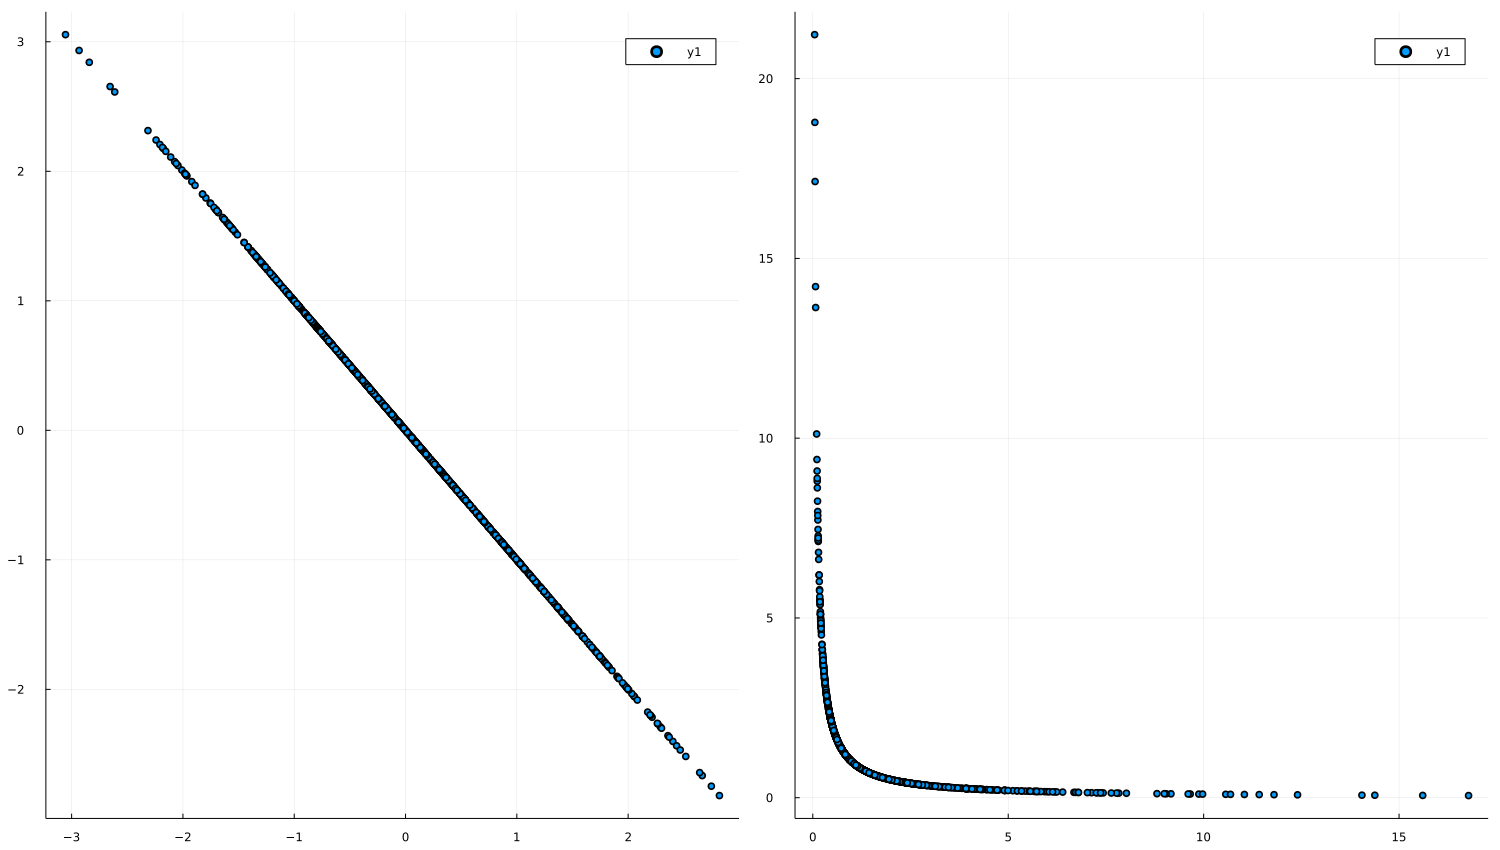

In [23]:
s1 = scatter(at_sample,-at_sample)
s2 = scatter(exp.(at_sample),exp.(-at_sample))
plot(s1,s2,layout=(1,2),size=(1500,850))

In [36]:
at_sample = rand(Nₛ,1000);

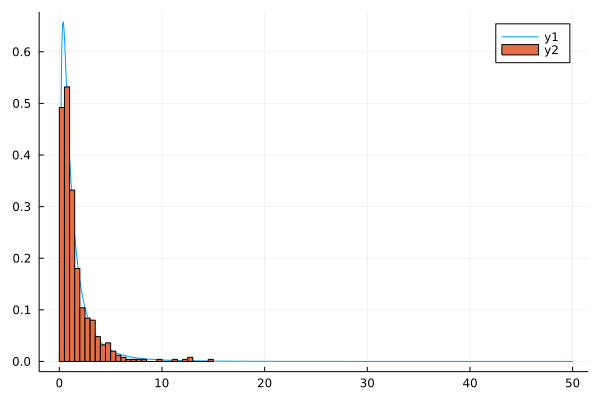

In [37]:
plot(0:.01:50, pdf.(LogNormal(μ,σ),0:.01:50))
histogram!(rand(LogNormal(μ,σ), 500),normed=true)

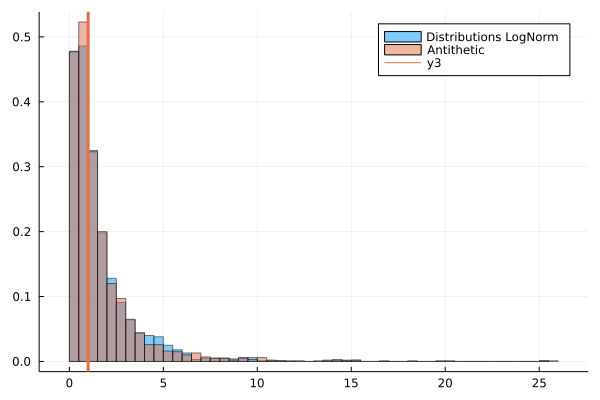

In [53]:
histogram(rand(LogNormal(μ,σ), 2000),normed=true,label="Distributions LogNorm",alpha=.5)
histogram!(exp.([at_sample;-at_sample]),normed=true,label="Antithetic",alpha=.5)
vline!([median(LogNormal(μ,σ))], linewidth=3, c=2)

In [30]:
# Mean, median and mode for log-N(0,1)
println(mean(LogNormal(μ,σ)))
println(median(LogNormal(μ,σ)))
println(mode(LogNormal(μ,σ)))

1.6487212707001282
1.0
0.36787944117144233


# Variance simulation

In [67]:
ns = 10:10:10000;
antithetic = zeros(length(ns));
accept_reject = zeros(length(ns));

In [68]:
for i in 1:length(ns)
    # Simulate E[X], where X~exp(N(0,1)) with accept reject monte carlo
    ar_sample = rand(Nₛ,ns[i]);
    accept_reject[i] = var(exp.(ar_sample));

    # Simulate E[X], where X~exp(N(0,1)) with antithetic accept reject monte carlo
    at_sample = rand(Nₛ,Int(ns[i]/2));
    at_sample = [at_sample;-at_sample];
    antithetic[i] = var(exp.(at_sample));
end

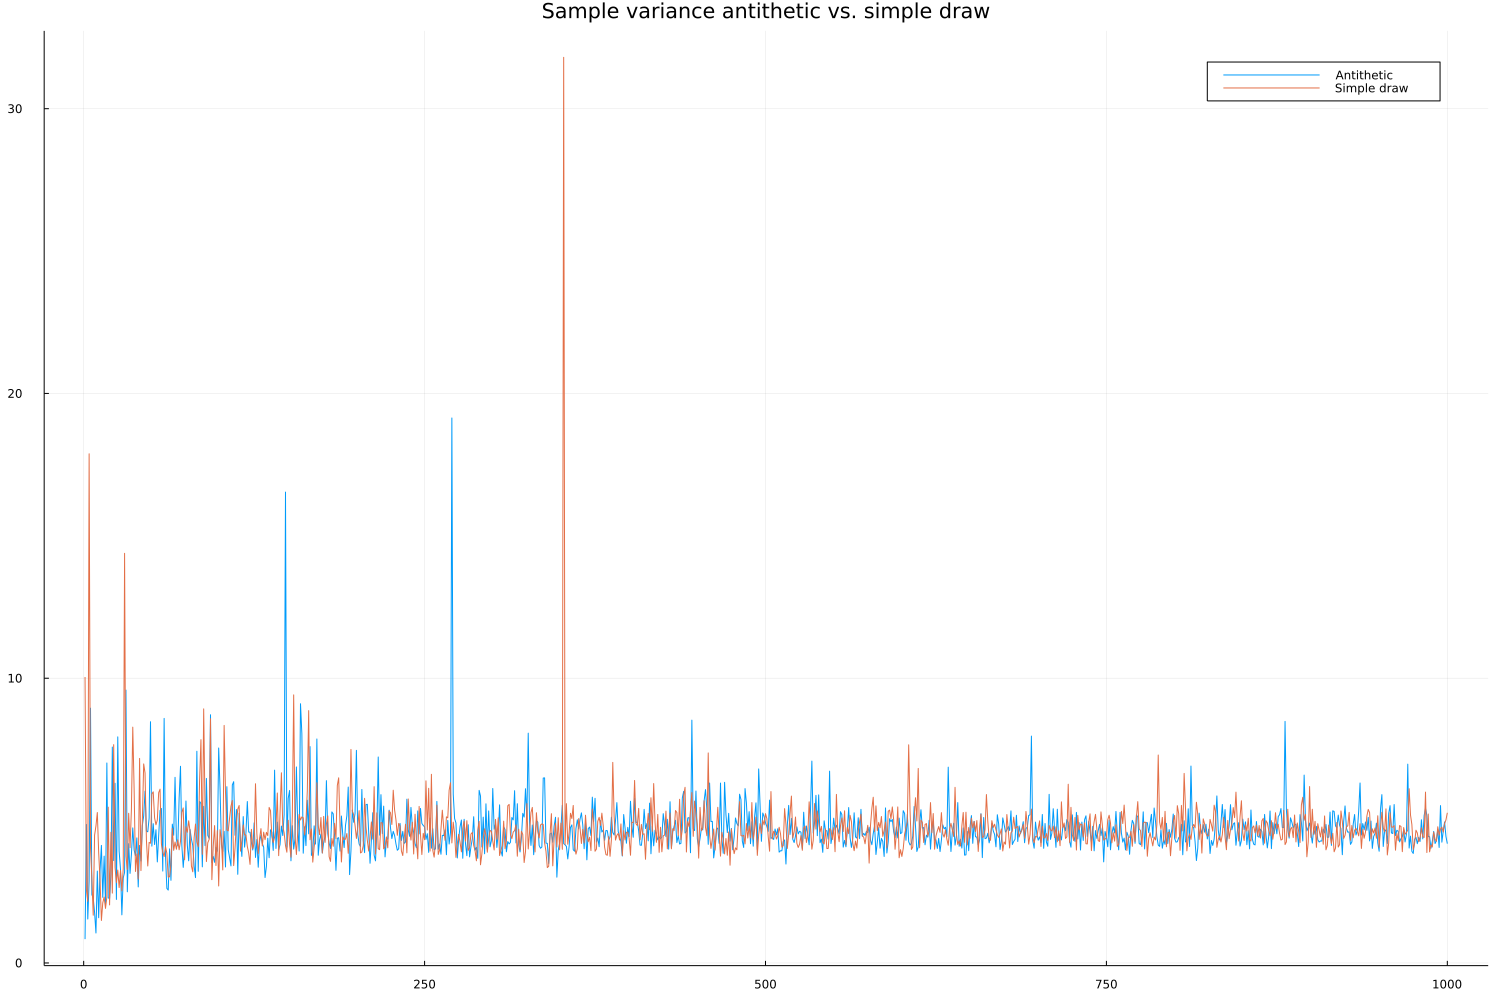

In [69]:
plot(
    [antithetic accept_reject],
    label=["Antithetic" "Simple draw"], 
    size=(1500,1000),
    title="Sample variance antithetic vs. simple draw"
)